In [2]:
import scipy.io as io
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style('darkgrid')

## load and reading of data

In [3]:
# Load the data
mat = io.loadmat('Faraday_con_ruido.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S', 't'])

In [4]:
mat['t'].shape

(1, 3600000)

In [5]:
df = pd.DataFrame(mat['S'], columns=['S'], index=mat['t'][0])
#df.index = df.index/3600
#df.index = pd.to_datetime(df.index, unit='s')
df.head()

,S
0.000,0.550278
0.001,0.550117
0.002,0.549151
0.003,0.549151
0.004,0.546252


In [6]:
df.shape

(3600000, 1)

## look up of data

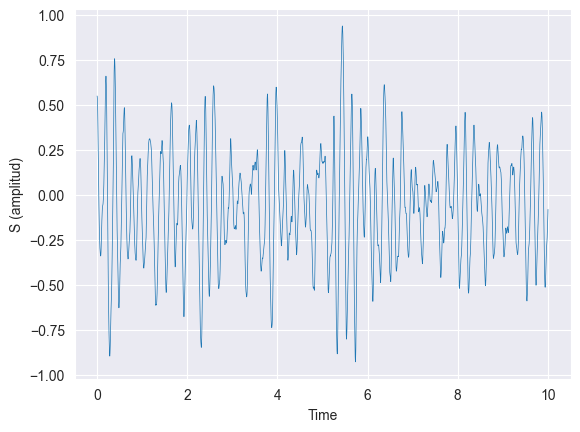

In [7]:
plt.plot(df.S[:10], linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('S (amplitud)')
plt.show()

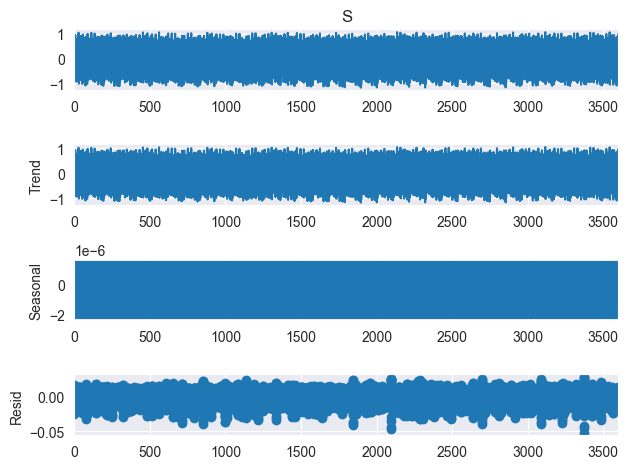

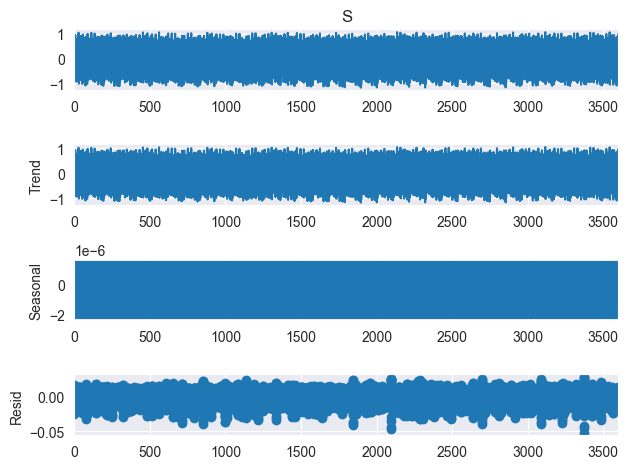

In [8]:
#decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.S, model='aditive',period=10)
decomposition.plot()
#print(decomposition.trend)
#print(decomposition.seasonal)
#print(decomposition.resid)
#print(decomposition.observed)

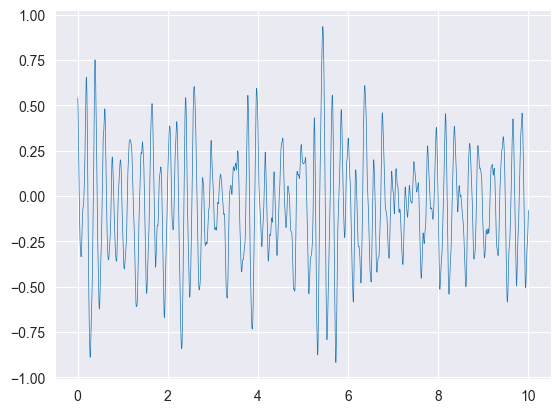

In [9]:
decomposition.trend[:10].plot(linewidth=0.5)
plt.plot(df.S[:0.001], linewidth=0.5, alpha=0.5, color='red')

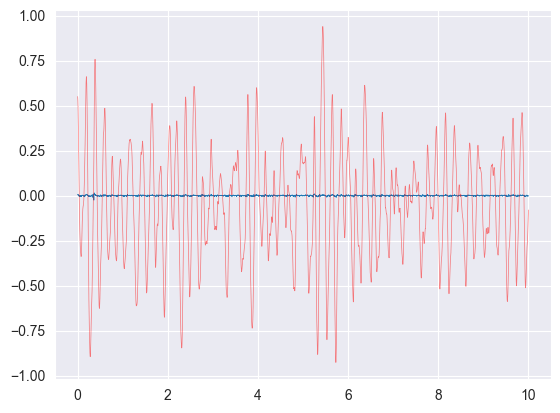

In [10]:
decomposition.resid[:10].plot(linewidth=0.5)
plt.plot(df.S[:10], linewidth=0.5, alpha=0.5, color='red')

<AxesSubplot: >

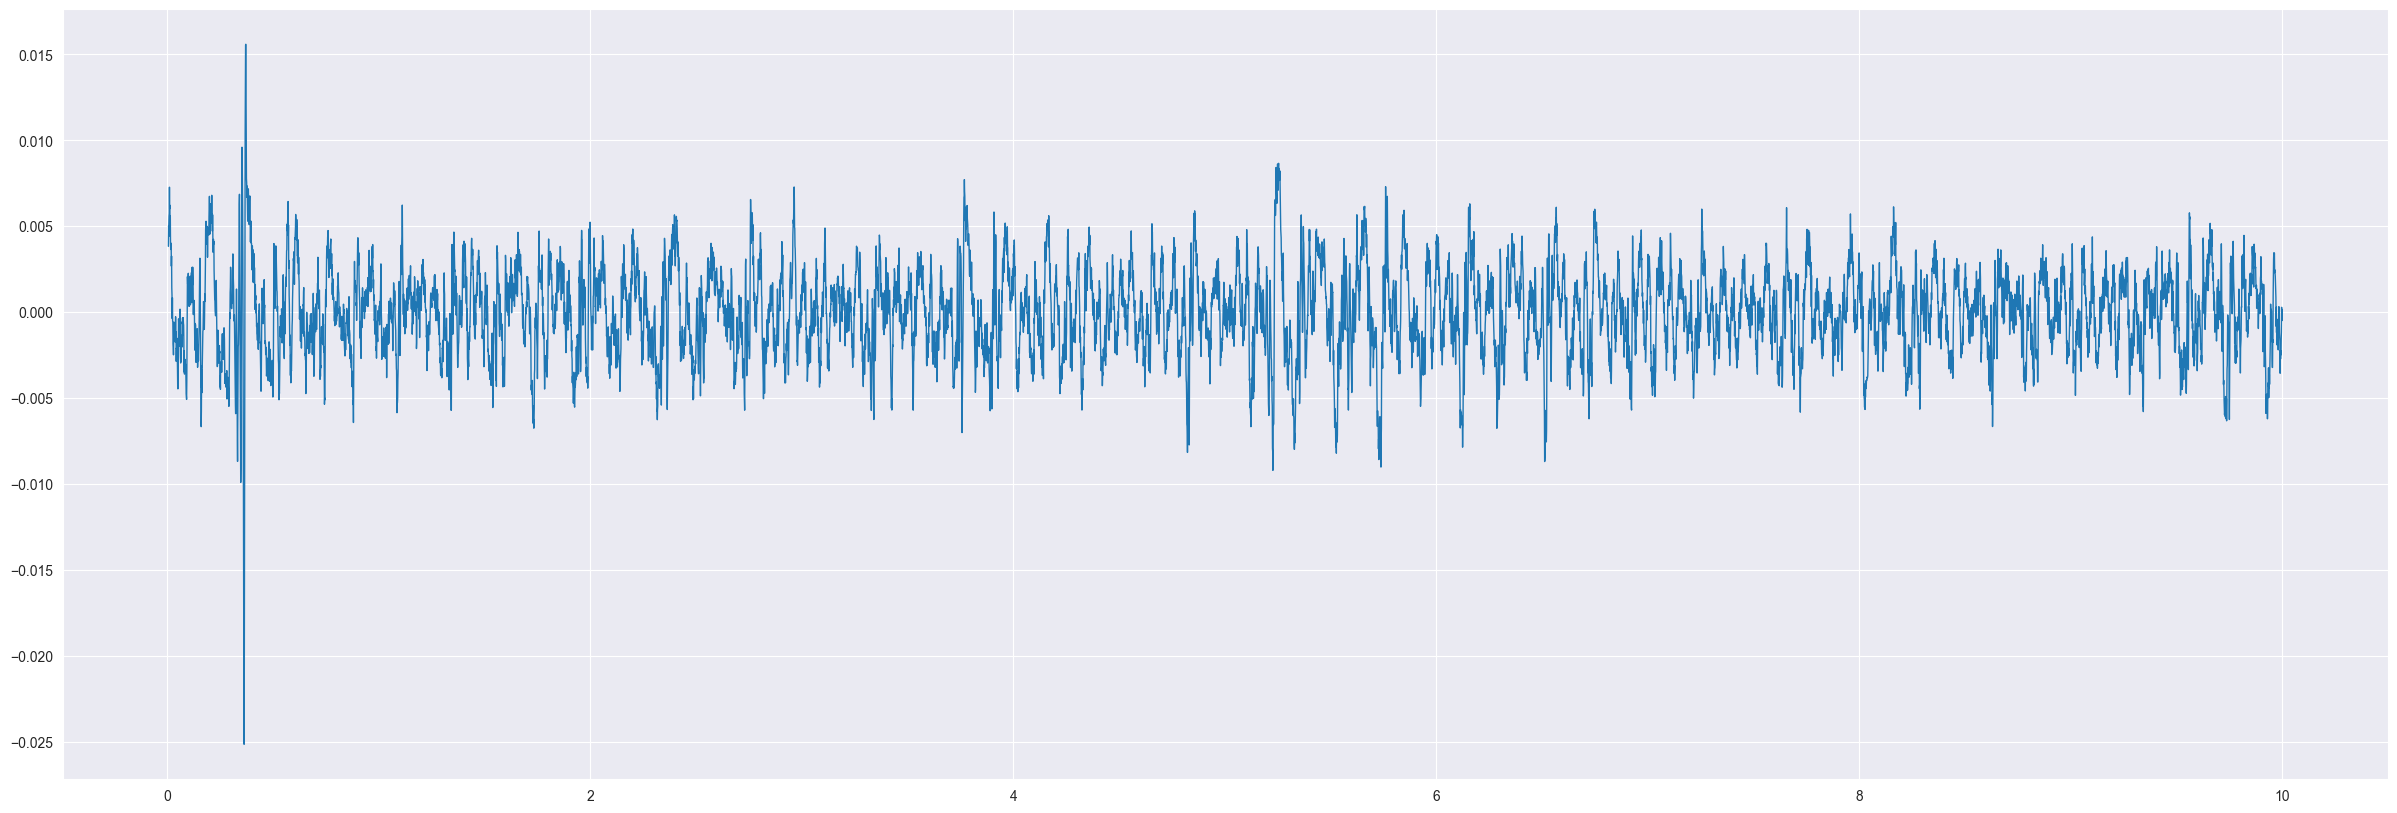

In [11]:
plt.figure(figsize=(30,10))
decomposition.resid[:10].plot(linewidth=1)

<AxesSubplot: >

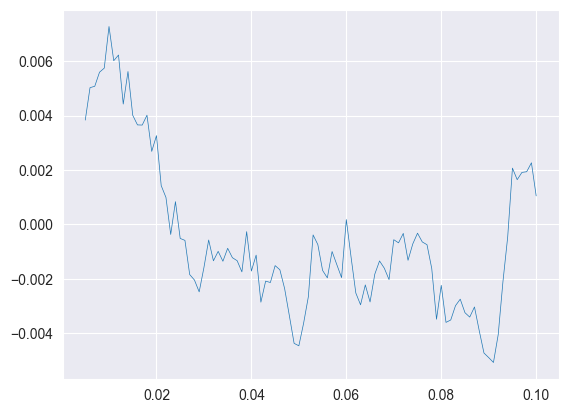

In [18]:
decomposition.resid[:0.1].plot(linewidth=0.5)

## Fast Fourier Transform

In [13]:
df_fft = df.copy()
df_fft['S_fft'] = np.fft.ifft(df_fft.S)

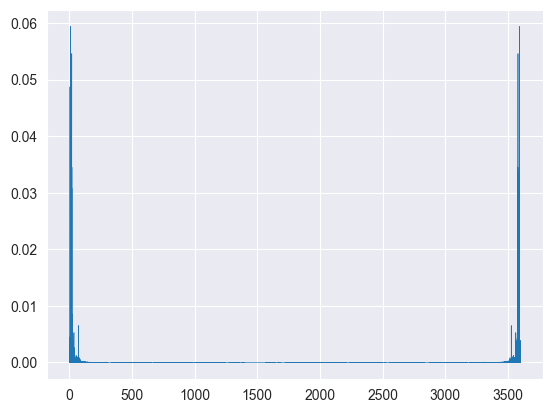

In [14]:
plt.plot(abs(df_fft.S_fft), linewidth=0.5)

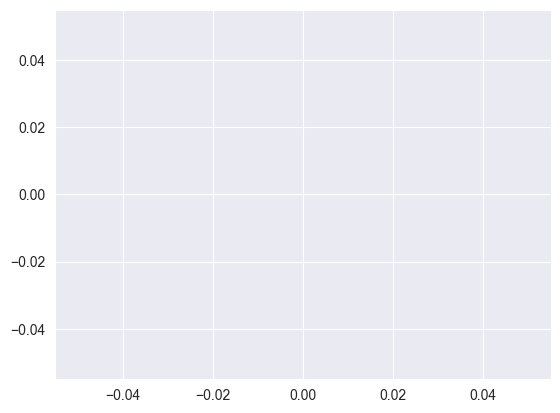

In [21]:
decomposition_resid = np.fft.fft(decomposition.resid)
plt.plot(abs(decomposition_resid), linewidth=1)

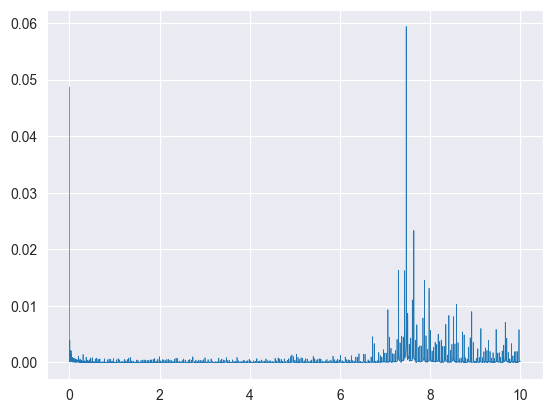

In [15]:
plt.plot(abs(df_fft[:10].S_fft), linewidth=0.5)

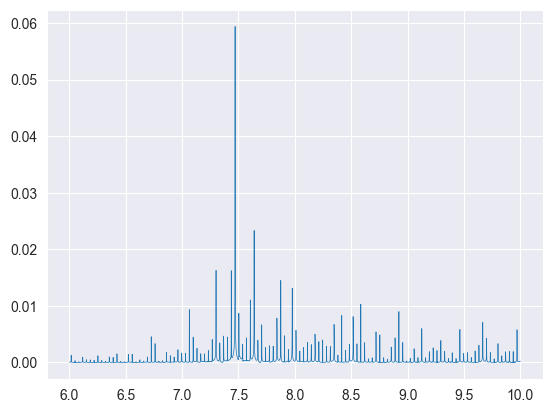

In [22]:
plt.plot(abs(df_fft.S_fft[6:10]), linewidth=0.5)